### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

##### feature
- Age: 환자의 나이
- Sex: 환자의 성별
- BP: 혈압
- Cholesterol: 콜레스테롤 수치
- Na_to_K: 나트륨-칼륨

##### target
- Drug: 의약품, 환자에게 효과가 있었던 약

In [1]:
import pandas as pd

drug_df = pd.read_csv('./datasets/drugs.csv')
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [2]:
drug_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [3]:
drug_df.duplicated().sum()

np.int64(0)

In [4]:
drug_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [5]:
na_to_k_df = drug_df.loc[:, 'Na_to_K'].reset_index()
na_to_k_df

,index,Na_to_K
0,0,25.355
1,1,13.093
2,2,10.114
3,3,7.798
4,4,18.043
...,...,...
195,195,11.567
196,196,12.006
197,197,9.894
198,198,14.020


In [6]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_na_to_k = std.fit_transform(na_to_k_df[['Na_to_K']])
std_na_to_k

array([[ 1.28652212],
       [-0.4151454 ],
       [-0.82855818],
       [-1.14996267],
       [ 0.27179427],
       [-1.03769314],
       [ 0.02643885],
       [-0.70046821],
       [-0.12676951],
       [ 0.45567206],
       [-0.59916196],
       [ 0.43221897],
       [-0.09832049],
       [ 0.674105  ],
       [-0.46926791],
       [-0.0788919 ],
       [-0.64245998],
       [-0.29316156],
       [-1.21935052],
       [ 1.37242427],
       [ 0.42236589],
       [ 1.36451406],
       [ 2.00995979],
       [-0.14550423],
       [ 2.41490725],
       [ 0.37809645],
       [ 1.9819271 ],
       [-0.93028076],
       [ 0.91765633],
       [ 0.25902691],
       [-1.01784822],
       [-0.90446848],
       [-0.70366006],
       [ 2.19147839],
       [-0.27081868],
       [-1.2211546 ],
       [-0.92139911],
       [-0.29787994],
       [-0.88476233],
       [-0.97149714],
       [ 0.43527203],
       [-0.25610845],
       [-0.04086736],
       [-0.53074555],
       [-0.5258884 ],
       [-1

In [7]:
na_to_k_df.Na_to_K = std_na_to_k
na_to_k_df

,index,Na_to_K
0,0,1.286522
1,1,-0.415145
2,2,-0.828558
3,3,-1.149963
4,4,0.271794
...,...,...
195,195,-0.626917
196,196,-0.565995
197,197,-0.859089
198,198,-0.286500


In [8]:
condition1 = na_to_k_df.Na_to_K >= -1.96
condition2 = na_to_k_df.Na_to_K <= 1.96
condition = condition1 & condition2

drug_df = drug_df.iloc[na_to_k_df[condition].index]
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [9]:
drug_enc_df = drug_df.reset_index()
drug_enc_df

,index,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355,drugY
1,1,47,M,LOW,HIGH,13.093,drugC
2,2,47,M,LOW,HIGH,10.114,drugC
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...,...
183,195,56,F,LOW,HIGH,11.567,drugC
184,196,16,M,LOW,HIGH,12.006,drugC
185,197,52,M,NORMAL,HIGH,9.894,drugX
186,198,23,M,NORMAL,NORMAL,14.020,drugX


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 메모리 효율증가: spares=True, 변환된 데이터를 바로 사용할 수 없다.
# 메모리 효율감소: spares=False, 변환된 데이터를 바로 사용할 수 있다.
bp_encoder = OneHotEncoder(sparse_output=False)
bp_onehot = bp_encoder.fit_transform(drug_enc_df[['BP']])
bp_cols = bp_encoder.get_feature_names_out(['BP'])
bp_onehot_df = pd.DataFrame(bp_onehot, columns=bp_cols)
drug_enc_df = pd.concat([drug_enc_df.iloc[:, :-1], bp_onehot_df], axis=1)
drug_enc_df['Drug'] = drug_df.Drug

gender_encoder = LabelEncoder()
genders = gender_encoder.fit_transform(drug_enc_df.Sex.tolist())
drug_enc_df['Sex'] = genders

cholesterol_encoder = LabelEncoder()
cholesterols = cholesterol_encoder.fit_transform(drug_enc_df.Cholesterol.tolist())
drug_enc_df['Cholesterol'] = cholesterols

drug_encoder = LabelEncoder()
targets = drug_encoder.fit_transform(drug_enc_df.Drug.tolist())
drug_enc_df['Drug'] = targets

In [11]:
drug_enc_df = drug_enc_df.drop(labels=['BP', 'index'], axis=1)
drug_enc_df

,Age,Sex,Cholesterol,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Drug
0,23,0,0,25.355,1.0,0.0,0.0,4
1,47,1,0,13.093,0.0,1.0,0.0,2
2,47,1,0,10.114,0.0,1.0,0.0,2
3,28,0,0,7.798,0.0,0.0,1.0,3
4,61,0,0,18.043,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...
183,56,0,0,11.567,0.0,1.0,0.0,4
184,16,1,0,12.006,0.0,1.0,0.0,5
185,52,1,0,9.894,0.0,0.0,1.0,4
186,23,1,1,14.020,0.0,0.0,1.0,1


In [12]:
print(drug_encoder.classes_)
print(gender_encoder.classes_)
print(bp_encoder.categories_)
print(cholesterol_encoder.classes_)

['drugA' 'drugB' 'drugC' 'drugX' 'drugY' 'nan']
['F' 'M']
[array(['HIGH', 'LOW', 'NORMAL'], dtype=object)]
['HIGH' 'NORMAL']


In [13]:
drug_encoder.inverse_transform(drug_enc_df.Drug)
bp_encoder.inverse_transform(bp_onehot)

array([['HIGH'],
       ['LOW'],
       ['LOW'],
       ['NORMAL'],
       ['LOW'],
       ['NORMAL'],
       ['NORMAL'],
       ['LOW'],
       ['NORMAL'],
       ['LOW'],
       ['LOW'],
       ['HIGH'],
       ['LOW'],
       ['LOW'],
       ['NORMAL'],
       ['HIGH'],
       ['LOW'],
       ['HIGH'],
       ['LOW'],
       ['HIGH'],
       ['LOW'],
       ['NORMAL'],
       ['LOW'],
       ['HIGH'],
       ['NORMAL'],
       ['LOW'],
       ['LOW'],
       ['NORMAL'],
       ['HIGH'],
       ['LOW'],
       ['NORMAL'],
       ['NORMAL'],
       ['HIGH'],
       ['LOW'],
       ['NORMAL'],
       ['NORMAL'],
       ['NORMAL'],
       ['HIGH'],
       ['NORMAL'],
       ['NORMAL'],
       ['NORMAL'],
       ['NORMAL'],
       ['HIGH'],
       ['LOW'],
       ['LOW'],
       ['HIGH'],
       ['NORMAL'],
       ['LOW'],
       ['HIGH'],
       ['HIGH'],
       ['LOW'],
       ['HIGH'],
       ['HIGH'],
       ['NORMAL'],
       ['HIGH'],
       ['LOW'],
       ['HIGH'],
       ['LOW']

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

# 연산 결과를 파일로 내보내기
dtc = DecisionTreeClassifier()

features, target = drug_enc_df.iloc[:, :-1], drug_enc_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, target, test_size=0.2, random_state=124)

dtc.fit(X_train, y_train)

export_graphviz(
    dtc,
    out_file='./images/drug_dtc01.dot',
    class_names=drug_encoder.classes_,
    feature_names=features.columns,
    impurity=True,
    filled=True
)

In [15]:
with open('./images/drug_dtc01.dot') as f:
    drug_dtc01 = f.read()

drug_dtc01_graph = graphviz.Source(drug_dtc01)
# 이미지 파일로 변환해서 내보내기
drug_dtc01_graph.render(filename='drug_dtc01', directory='./images', format='png')

'images\\drug_dtc01.png'

<img src="./images/drug_dtc01.png">

In [16]:
dtc.feature_importances_

array([0.36977564, 0.0385535 , 0.02191672, 0.46424234, 0.0460251 ,
       0.03976166, 0.01972504])

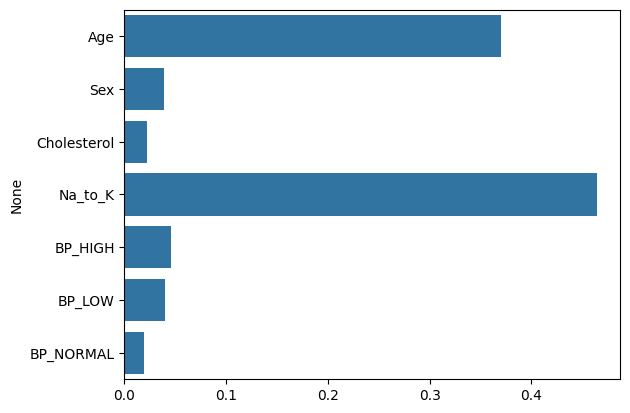

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

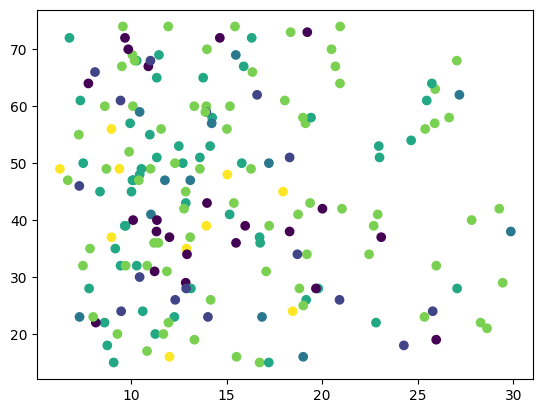

In [18]:
plt.scatter(features.Na_to_K, features.Age, c=target)
plt.show()

In [19]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

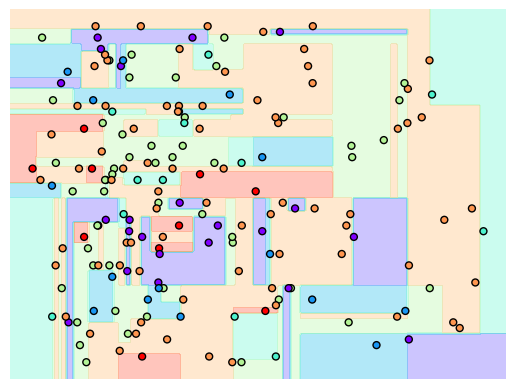

In [20]:
visualize_boundary(dtc, features[["Na_to_K", "Age"]], target)

In [21]:
dtc = DecisionTreeClassifier(min_samples_leaf=16)

features, target = drug_enc_df.iloc[:, :-1], drug_enc_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, target, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,16
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


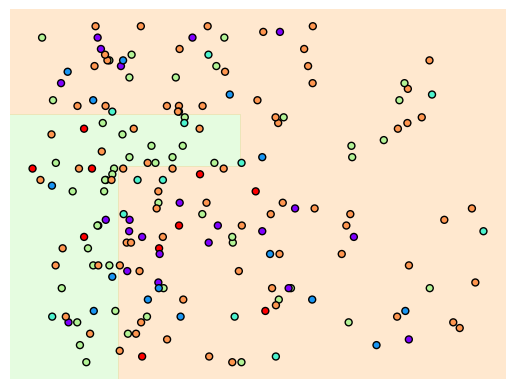

In [22]:
visualize_boundary(dtc, features[["Na_to_K", "Age"]], target)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test[['Na_to_K', 'Age']].values))

0.5789473684210527